In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# helper functions

def plot(graphs, title):
    plt.figure(figsize=(14, 4))
    for graph in graphs:
        plt.plot(graph['x'], graph['y'], marker='o', color=graph['color'], label=graph['label'])
        plt.xlabel(graph['xlabel'])
        plt.ylabel(graph['ylabel'])
    plt.xticks(graphs[0]['x'])
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

def bar(bars, title, width=0.25, figsize=(14, 4)):
    plt.figure(figsize=figsize)
    for i, bar in enumerate(bars):
        plt.bar(bar['x'] + width * i, bar['y'], color=bar['color'], width=width, edgecolor='black',label=bar['label'])
    plt.ylim([0.9, 1.7])
    plt.xticks(bars[0]['x'])
    plt.xlabel(bar['xlabel'])
    plt.ylabel(bar['ylabel'])
    plt.title(title) 
    plt.legend()
    plt.grid()
    plt.show()

def correlation(df_x, xlabel, df_y, ylabel):
    plt.figure(figsize=(5, 5))

    plt.scatter(df_x, df_y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title('Диаграмма рассеяния')
    plt.grid()
    plt.show()

    print(f'Коэффициент корреляции = {df_x.corr(df_y)}')

def create_industry_df_with_inflation(df_industry, df_inflation):
    df_industry_with_inflation = pd.merge(df_industry, df_inflation, on='Год', how='outer')
    df_industry_with_inflation['Реальная зарплата'] = df_industry_with_inflation['Средняя зарплата'] / (1 + 0.01 * df_industry_with_inflation['Инфляция'])
    df_industry_with_inflation['Изменение зп'] = df_industry_with_inflation['Средняя зарплата'] / df_industry_with_inflation['Средняя зарплата'].shift()
    df_industry_with_inflation['Реальное изменение зп'] = df_industry_with_inflation['Реальная зарплата'] / df_industry_with_inflation['Реальная зарплата'].shift()
    return df_industry_with_inflation

def analyse_industry(industry_name, df_industry_with_inflation, show_dynamics=True):
    print(f'Данные по отрасли "{industry_name}":\n', df_industry_with_inflation.head())
    plot(
        title=f'Отрасль "{industry_name}" - графики средней зп с учетом инфляции и без',
        graphs=[
            {
                'x': df_industry_with_inflation['Год'],
                'xlabel': 'год',
                'y': df_industry_with_inflation['Средняя зарплата'],
                'ylabel': 'тыс. рублей',
                'color': 'green',
                'label': 'с учетом инфляции (номинальная)'
            },
            {
                'x': df_industry_with_inflation['Год'],
                'xlabel': 'год',
                'y': df_industry_with_inflation['Реальная зарплата'],
                'ylabel': 'тыс. рублей',
                'color': 'blue',
                'label': 'без учета инфляции (реальная)'
            },
            ]
        )
    if show_dynamics:
        bar(
            title=f'Отрасль "{industry_name}" - динамика изменения зп с учетом инфляции и без',
            bars=[
                {
                    'x': df_industry_with_inflation['Год'][1:],
                    'xlabel': 'год',
                    'y': df_industry_with_inflation['Изменение зп'][1:],
                    'ylabel': 'коэфф',
                    'color': 'blue',
                    'label': 'изменение зп с учетом инфляции'
                },
                {
                    'x': df_industry_with_inflation['Год'][1:],
                    'xlabel': 'год',
                    'y': df_industry_with_inflation['Реальное изменение зп'][1:],
                    'ylabel': 'коэфф',
                    'color': 'green',
                    'label': 'изменение зп без учета инфляции (реальное)'
                }
                ]
            )

## 1. Уровень инфляции

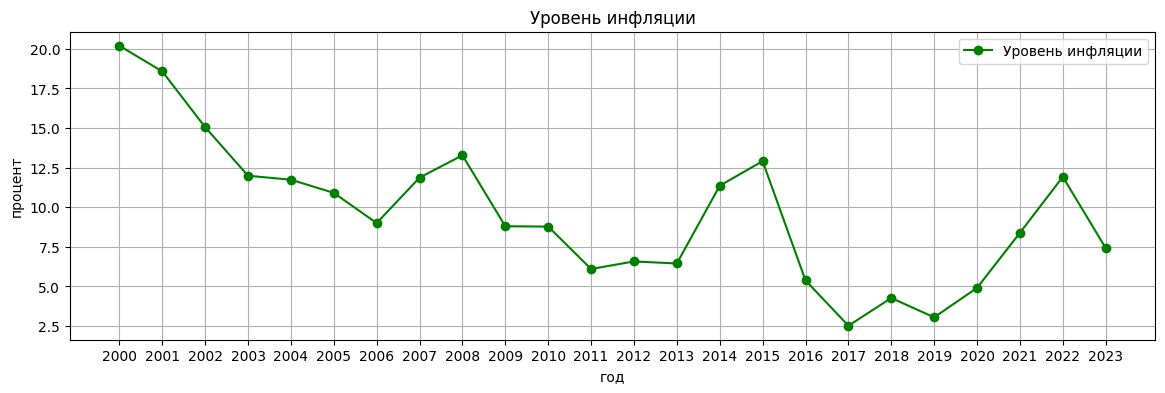

In [3]:
# уровень инфляции
df_inflation = pd.read_csv("data/инфляция.csv", delimiter=';')
plot(
    title='Уровень инфляции',
    graphs=[{
            'x': df_inflation['Год'],
            'xlabel': 'год',
            'y': df_inflation['Инфляция'],
            'ylabel': 'процент',
            'color': 'green',
            'label': 'Уровень инфляции'
        }]
    )

### Выводы
По графику четко видны годы максимального и минимального уровня инфляции.

## 2. Анализ отрасли образования

Данные по отрасли "Образование":
     Год  Средняя зарплата  Инфляция  Реальная зарплата  Изменение зп  \
0  2000              1240     20.20        1031.613977           NaN   
1  2001              1833     18.58        1545.791870      1.478226   
2  2002              2927     15.06        2543.890144      1.596836   
3  2003              3387     11.99        3024.377177      1.157157   
4  2004              4203     11.74        3761.410417      1.240921   

   Реальное изменение зп  
0                    NaN  
1               1.498421  
2               1.645687  
3               1.188879  
4               1.243698  


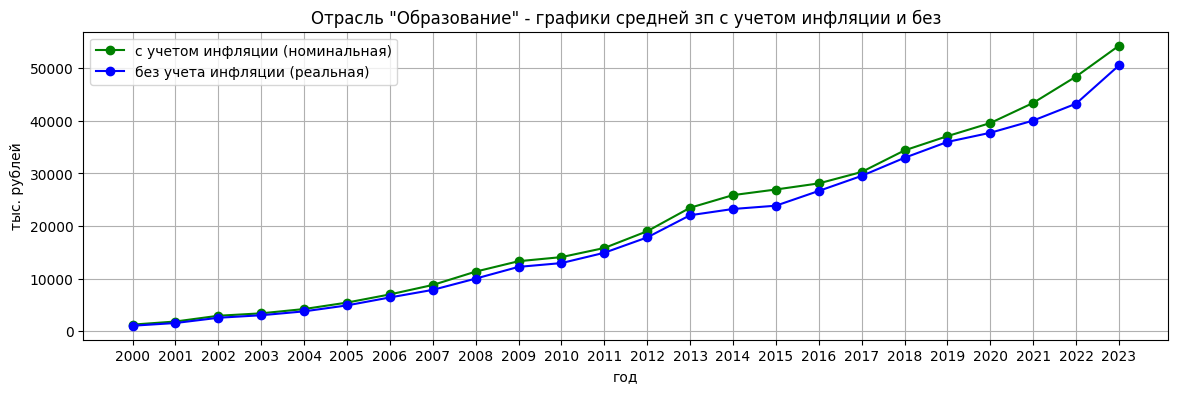

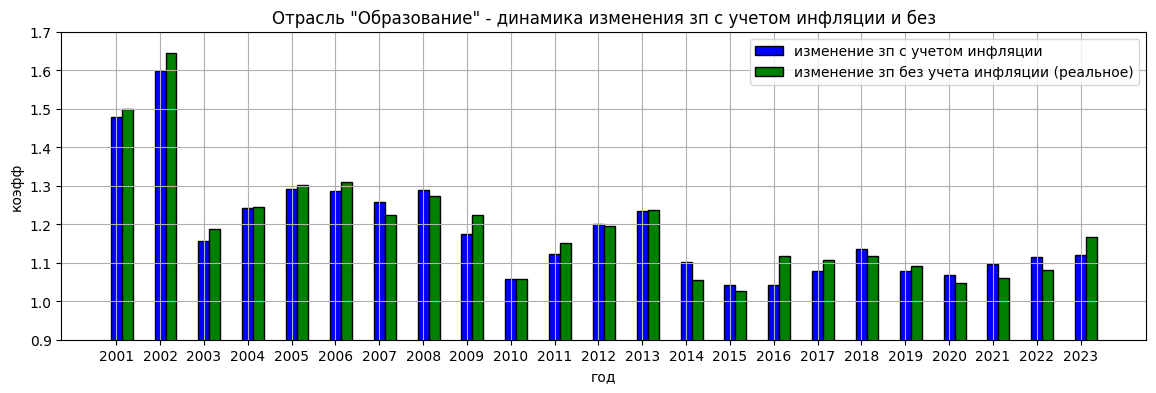

In [4]:
# средние зарплаты
df_education_industry = pd.read_csv("data/образование.csv", delimiter=';')
df_education_industry_with_inflation = create_industry_df_with_inflation(df_education_industry, df_inflation)
analyse_industry('Образование', df_education_industry_with_inflation)

### Выводы

Судя по графикам средней зарплаты с учетом инфляции и без и графику динамики изменения зп с учетом инфляции и без, можно сделать вывод, что средняя зп в отрасли образования растет из года в год, при этом характерно влияние кризисов на уровень зп.


## 3. Анализ отрасли строительства

Данные по отрасли "Строительство":
     Год  Средняя зарплата  Инфляция  Реальная зарплата  Изменение зп  \
0  2000              2640     20.20        2196.339434           NaN   
1  2001              3859     18.58        3254.343060      1.461742   
2  2002              4807     15.06        4177.820268      1.245659   
3  2003              6177     11.99        5515.671042      1.285001   
4  2004              7305     11.74        6537.497763      1.182613   

   Реальное изменение зп  
0                    NaN  
1               1.481712  
2               1.283768  
3               1.320227  
4               1.185259  


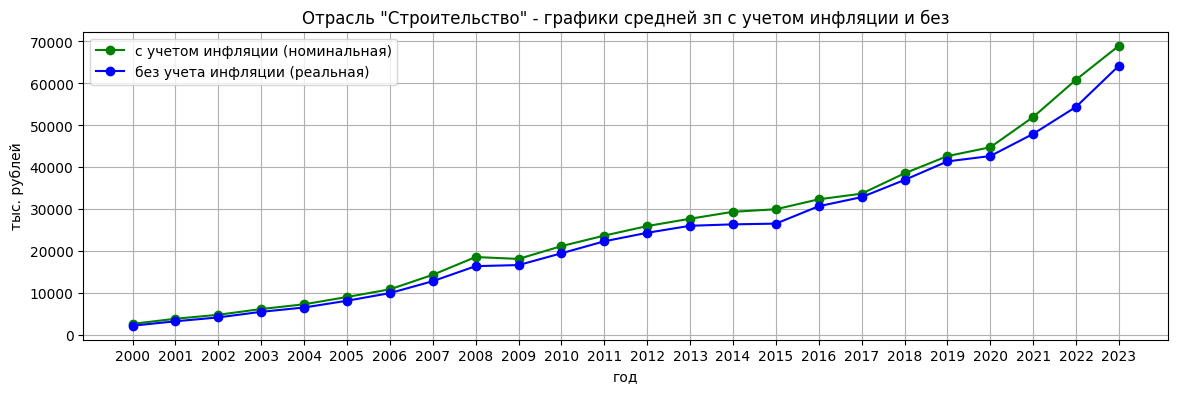

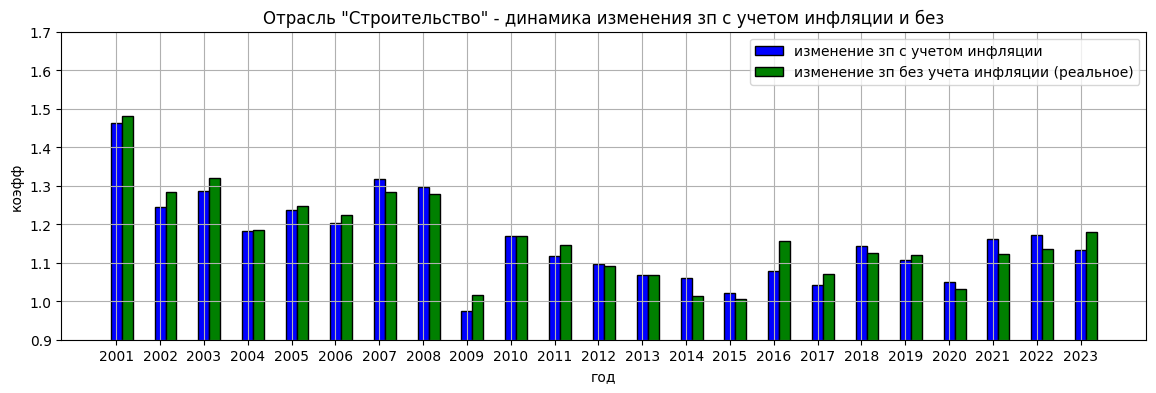

In [5]:
df_construction_industry = pd.read_csv("data/строительство.csv", delimiter=';')
df_construction_industry_with_inflation = create_industry_df_with_inflation(df_construction_industry, df_inflation)
analyse_industry('Строительство', df_construction_industry_with_inflation)

### Выводы

Судя по графикам средней зарплаты с учетом инфляции и без и графику динамики изменения зп с учетом инфляции и без, можно сделать вывод, что наибольший рост реальной зп был в период 2001 года. Стоит заметить, что в период 2009 года, несмотря на падение уровня номинальной зп, реальная зп (без учета инфляции) выросла. Это можно объяснить заметным снижением уровня инфляции с пикого 2008 года - 13.28% до 8.80% в 2009.

## 4. Анализ отрасли здравоохранения

Данные по отрасли "Здравоохранение":
     Год  Средняя зарплата  Инфляция  Реальная зарплата  Изменение зп  \
0  2000              1333     20.20        1108.985025           NaN   
1  2001              1960     18.58        1652.892562      1.470368   
2  2002              3141     15.06        2729.880063      1.602551   
3  2003              3663     11.99        3270.827752      1.166189   
4  2004              4612     11.74        4127.438697      1.259077   

   Реальное изменение зп  
0                    NaN  
1               1.490455  
2               1.651577  
3               1.198158  
4               1.261894  


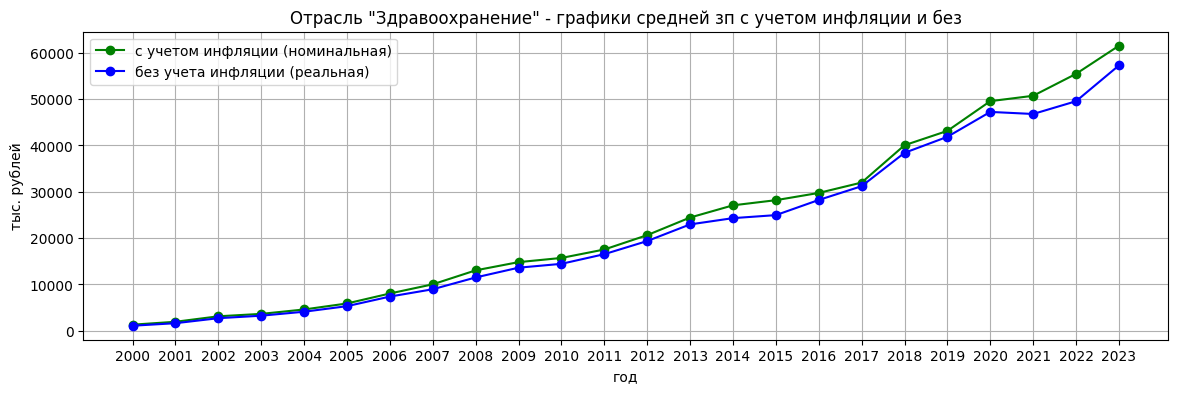

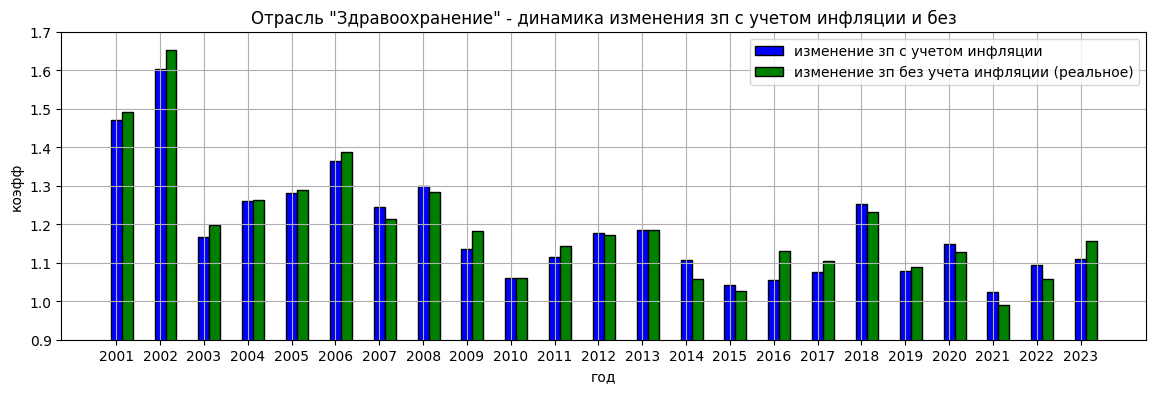

In [6]:
# Изменение зарплат в здравоохранении

df_healthcare_industry = pd.read_csv("data/здравоохранение.csv", delimiter=';')
df_healthcare_industry_with_inflation = create_industry_df_with_inflation(df_healthcare_industry, df_inflation)
analyse_industry('Здравоохранение', df_healthcare_industry_with_inflation)

### Выводы

Судя по графикам средней зарплаты с учетом инфляции и без и графику динамики изменения зп с учетом инфляции и без, можно сделать вывод, что наибольший рост реальной зп был в период 2002 года, наименьший - в 2021. Стоит обратить внимание, что несмотря на повышение номинальной средней зп в 2021 году на 2% по сравнению с 2020 годом, уровень реальной зп (без учета инфляции) снизился на 1%


### Выводы из сравнения трех отраслей (образование, строительство, здравоохранение)

Проанализировав представленные графики по трем отраслям: образование, строительство, здравоохранение, можно обнаружить сходства в периодах наибольшего роста и наибольшего падения реальной зп. Это объясняется влиянием кризисов разных периодов на экономику в целом. Стоит заметить, что каждый год происходит повышение уровня реальной зп по сравнению с предыдущем годом (не учитывая отрасль здравоохранения в период 2021 года)



## 5. Дополнительное исследование №1

### Корреляция уровня реальной зп и продаж авто

    Год  Число проданных новых авто
0  2007                     2362228
1  2008                     2930202
2  2009                     1465917
3  2010                     1910824
4  2011                     2653848


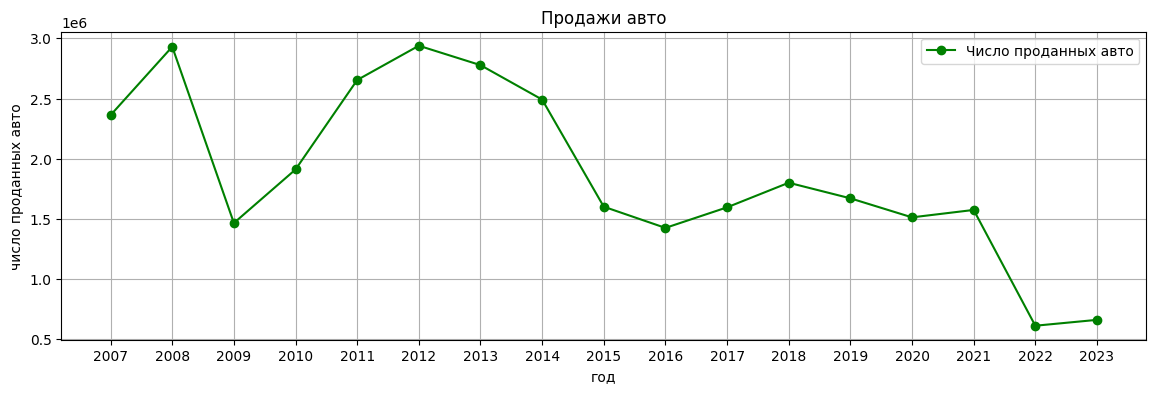

Данные по отрасли "Все":
     Год  Средняя зарплата  Инфляция  Реальная зарплата  Изменение зп  \
0  2007             13593     11.87       12150.710646           NaN   
1  2008             17290     13.28       15263.064972      1.271978   
2  2009             18638      8.80       17130.514706      1.077964   
3  2010             20952      8.78       19260.893547      1.124155   
4  2011             23369      6.10       22025.447691      1.115359   

   Реальное изменение зп  
0                    NaN  
1               1.256146  
2               1.122351  
3               1.124362  
4               1.143532  


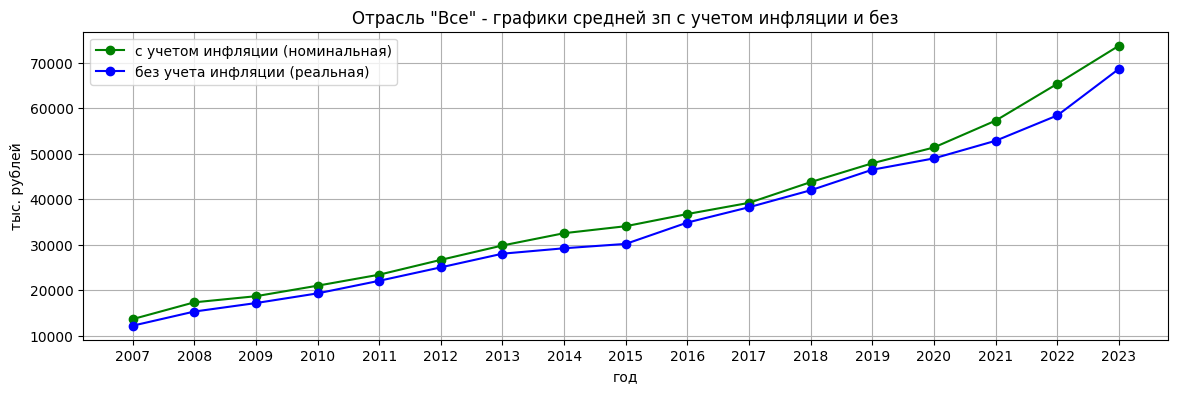

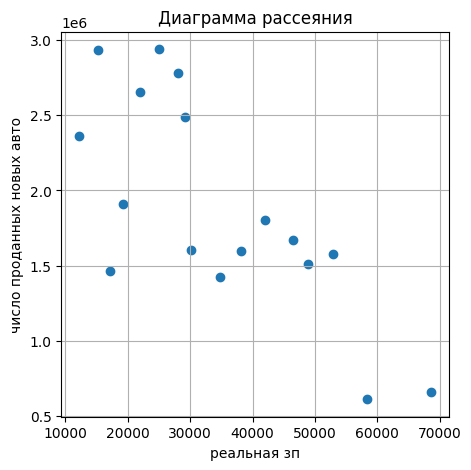

Коэффициент корреляции = -0.7485232809894357


In [7]:
# продажи авто
df_auto = pd.read_csv("data/продажи-авто.csv", delimiter=';')
print(df_auto.head())
plot(
    title='Продажи авто',
    graphs=[{
            'x': df_auto['Год'],
            'xlabel': 'год',
            'y': df_auto['Число проданных новых авто'],
            'ylabel': 'число проданных авто',
            'color': 'green',
            'label': 'Число проданных авто'
        }]
    )

# все отрасли
df_all_industries = pd.read_csv("data/средняя-зп-по-всем-отраслям.csv", delimiter=';')
df_all_industries_with_inflation = create_industry_df_with_inflation(df_all_industries.loc[df_all_industries['Год'] >= 2007], df_inflation.loc[df_inflation['Год'] >= 2007])
analyse_industry('Все', df_all_industries_with_inflation, show_dynamics=False)

# корреляция 
correlation(df_all_industries_with_inflation.loc[df_all_industries_with_inflation['Год'] >= 2007]['Реальная зарплата'],'реальная зп', df_auto['Число проданных новых авто'], 'число проданных новых авто')

### Выводы
Коэффициент корреляции =~ -0.75
Существует сильная обратная линейная корреляционная зависимость между числом продаваемых авто и уровнем реальной зп


## Дополнительное исследование №2

### Корреляция уровня реальной зп и безработицы

    Год  Процент безработных
0  2000                 10.6
1  2001                  9.0
2  2002                  7.9
3  2003                  8.2
4  2004                  7.8


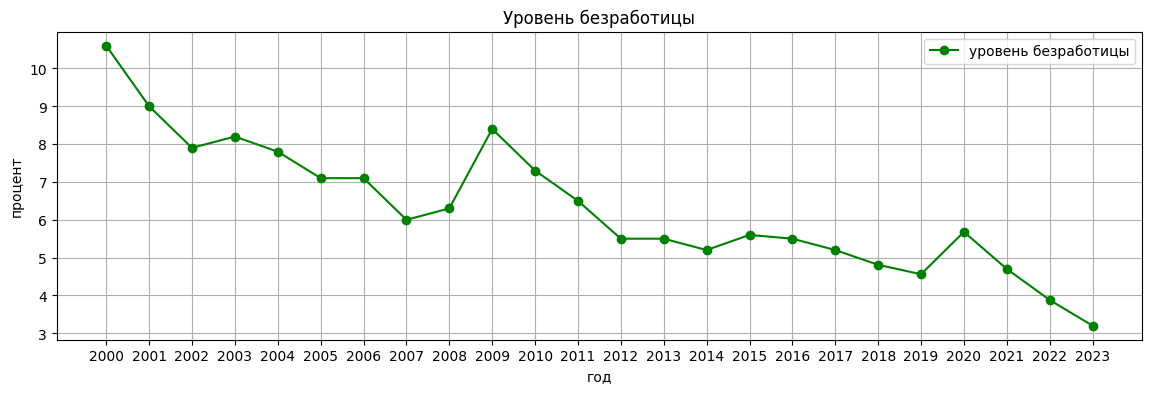

Данные по отрасли "Все":
     Год  Средняя зарплата  Инфляция  Реальная зарплата  Изменение зп  \
0  2000              2223     20.20        1849.417637           NaN   
1  2001              3240     18.58        2732.332602      1.457490   
2  2002              4360     15.06        3789.327307      1.345679   
3  2003              5499     11.99        4910.259845      1.261239   
4  2004              6740     11.74        6031.859674      1.225677   

   Реальное изменение зп  
0                    NaN  
1               1.477402  
2               1.386847  
3               1.295813  
4               1.228420  


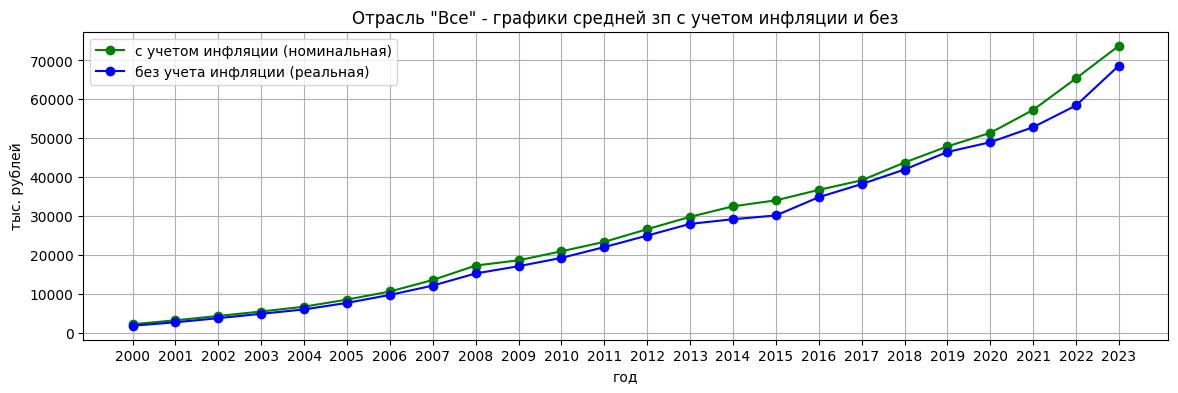

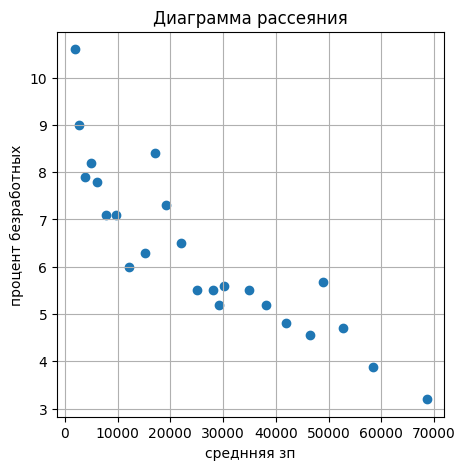

Коэффициент корреляции = -0.8776260458970139


In [8]:
# уровень безработицы
df_unemployment = pd.read_csv("data/уровень-безработицы.csv", delimiter=';')
print(df_unemployment.head())
plot(
    title='Уровень безработицы',
    graphs=[{
            'x': df_unemployment['Год'],
            'xlabel': 'год',
            'y': df_unemployment['Процент безработных'],
            'ylabel': 'процент',
            'color': 'green',
            'label': 'уровень безработицы'
        }]
    )

# все отрасли
df_all_industries = pd.read_csv("data/средняя-зп-по-всем-отраслям.csv", delimiter=';')
df_all_industries_with_inflation = create_industry_df_with_inflation(df_all_industries, df_inflation)
analyse_industry('Все', df_all_industries_with_inflation, show_dynamics=False)

# корреляция
correlation(df_all_industries_with_inflation['Реальная зарплата'], 'среднняя зп', df_unemployment['Процент безработных'], 'процент безработных')

### Выводы
Коэффициент корреляции =~ -0.88  
Существует сильная обратная линейная корреляционная зависимость между процентом безработных и уровнем реальной зп
